In [4]:
pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ----------------- ---------------------- 17.0/39.5 MB 97.5 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 109.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\12905\anaconda3\python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [8]:
# load dataset
data=tf.keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=data.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


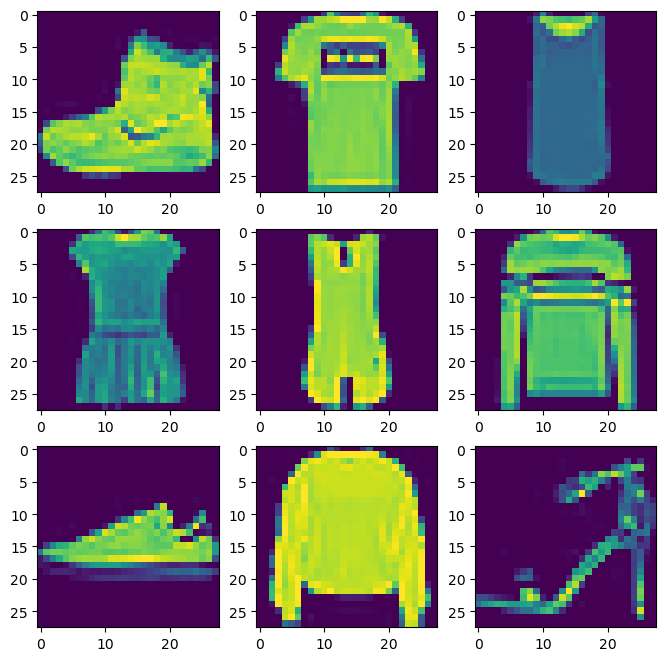

In [15]:
#visualize images
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
def plotdata(images,num):
    plt.figure(figsize=(8,8))
    for i in range(num):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
    plt.show()

plotdata(xtrain,9)

SIFT

In [17]:
def extract_features(image):
    features=[]
    for i in image:
        keypoint,descriptor=sift.detectAndCompute(i,None)
        if descriptor is not None:
            features.append(np.mean(descriptor,axis=0))
        else:
            features.append(np.zeros(128))
    return np.array(features)

# create SIFT feature extractor
sift = cv2.SIFT_create()

In [19]:
xtrain_sift =extract_features(xtrain)
xtest_sift =extract_features(xtest)

In [23]:
scaler=StandardScaler()
xtrain_sift=scaler.fit_transform(xtrain_sift)
xtest_sift=scaler.transform(xtest_sift)

In [25]:
y_trainc=to_categorical(ytrain,10)
y_testc=to_categorical(ytest,10)

In [27]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

C:\Users\12905\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(xtrain_sift,y_trainc,epochs=20,batch_size=32,validation_data=(xtest_sift,y_testc))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5164 - loss: 1.4208 - val_accuracy: 0.6195 - val_loss: 1.0995
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6199 - loss: 1.1151 - val_accuracy: 0.6372 - val_loss: 1.0498
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6357 - loss: 1.0536 - val_accuracy: 0.6486 - val_loss: 1.0211
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6478 - loss: 1.0140 - val_accuracy: 0.6543 - val_loss: 1.0048
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6631 - loss: 0.9665 - val_accuracy: 0.6540 - val_loss: 0.9888
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6738 - loss: 0.9429 - val_accuracy: 0.6635 - val_loss: 0.9810
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6829 - loss: 0.9099 - val_accuracy: 0.6668 - val_loss: 0.9730
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6845 - loss: 0.9067 - 

In [33]:
tloss,tacc=model.evaluate(xtest_sift,y_testc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.6751 - loss: 0.9648


In [35]:
print(f'test_accuracy:{tacc*100: .2f}%')

test_accuracy: 67.49%


### Combination 2: change the hyperparameter to LR  = 0.1 ; batch size =4  optimizer = SGD , activation function. = sigmoid and the loss function is MAE

In [37]:
model=Sequential([
    Dense(512,activation='sigmoid',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='sigmoid',input_shape=(128,)),
    Dropout(0.2),
    Dense(128,activation='sigmoid'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

In [39]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss='mae',metrics=['accuracy'])

In [41]:
model.fit(xtrain_sift,y_trainc,epochs=4,batch_size=4,validation_data=(xtest_sift,y_testc))

Epoch 1/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 8s 533us/step - accuracy: 0.1086 - loss: 0.1789 - val_accuracy: 0.2372 - val_loss: 0.1603
Epoch 2/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 8s 506us/step - accuracy: 0.2385 - loss: 0.1556 - val_accuracy: 0.2638 - val_loss: 0.1479
Epoch 3/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 8s 508us/step - accuracy: 0.2629 - loss: 0.1482 - val_accuracy: 0.2682 - val_loss: 0.1464
Epoch 4/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 8s 528us/step - accuracy: 0.2964 - loss: 0.1429 - val_accuracy: 0.3273 - val_loss: 0.1361


In [43]:
tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.3282 - loss: 0.1360
test_accuracy: 32.73%


### combination 3: tanh , rmsprop, 16, 0.01, MSE

In [45]:
model=Sequential([
    Dense(512,activation='tanh',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='tanh',input_shape=(128,)),
    Dropout(0.2),
    Dense(128,activation='tanh'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

In [47]:
from tensorflow.keras.optimizers import RMSprop

In [49]:
model.compile(optimizer= RMSprop(learning_rate=0.01),loss='mse',metrics=['accuracy'])

In [51]:
model.fit(xtrain_sift,y_trainc,epochs=16,batch_size=16,validation_data=(xtest_sift,y_testc))

Epoch 1/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 853us/step - accuracy: 0.4143 - loss: 0.0798 - val_accuracy: 0.4575 - val_loss: 0.0775
Epoch 2/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 821us/step - accuracy: 0.4688 - loss: 0.0743 - val_accuracy: 0.4697 - val_loss: 0.0717
Epoch 3/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 821us/step - accuracy: 0.4702 - loss: 0.0745 - val_accuracy: 0.5010 - val_loss: 0.0703
Epoch 4/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 822us/step - accuracy: 0.4682 - loss: 0.0750 - val_accuracy: 0.4714 - val_loss: 0.0708
Epoch 5/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 826us/step - accuracy: 0.4702 - loss: 0.0747 - val_accuracy: 0.4799 - val_loss: 0.0694
Epoch 6/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 824us/step - accuracy: 0.4763 - loss: 0.0741 - val_accuracy: 0.5200 - val_loss: 0.0709
Epoch 7/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 828us/step - accuracy: 0.4806 - loss: 0.0741 - val_accuracy: 0.5048 - val_loss: 0.0722
Epoch 8/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 823us/step - accuracy: 0.4829 -

In [53]:
tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5134 - loss: 0.0710
test_accuracy: 51.54%


### combination 4: 0.001 , batch 8 , sgd ,  sigmoid, huber loss function

In [55]:
model=Sequential([
    Dense(512,activation='sigmoid',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='sigmoid',input_shape=(128,)),
    Dropout(0.2),
    Dense(128,activation='sigmoid'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

In [57]:
model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.001),loss=tf.keras.losses.Huber(),metrics=['accuracy'])

In [59]:
model.fit(xtrain_sift,y_trainc,epochs=8,batch_size=8,validation_data=(xtest_sift,y_testc))

Epoch 1/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 619us/step - accuracy: 0.1003 - loss: 0.0462 - val_accuracy: 0.1000 - val_loss: 0.0453
Epoch 2/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 591us/step - accuracy: 0.0996 - loss: 0.0459 - val_accuracy: 0.1226 - val_loss: 0.0452
Epoch 3/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 603us/step - accuracy: 0.0997 - loss: 0.0458 - val_accuracy: 0.1116 - val_loss: 0.0451
Epoch 4/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 644us/step - accuracy: 0.0995 - loss: 0.0457 - val_accuracy: 0.1065 - val_loss: 0.0451
Epoch 5/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 602us/step - accuracy: 0.1039 - loss: 0.0456 - val_accuracy: 0.1136 - val_loss: 0.0450
Epoch 6/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 741us/step - accuracy: 0.1010 - loss: 0.0456 - val_accuracy: 0.1164 - val_loss: 0.0450
Epoch 7/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 594us/step - accuracy: 0.0987 - loss: 0.0456 - val_accuracy: 0.1176 - val_loss: 0.0450
Epoch 8/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 593us/step - accuracy: 0.0980 - loss: 0

In [62]:
tloss,tacc=model.evaluate(xtest_sift,y_testc)
print(f'test_accuracy:{tacc*100: .2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.1264 - loss: 0.0450
test_accuracy: 12.18%


## Task 2

In [64]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='relu'),
    Dropout(0.3),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')

])

C:\Users\12905\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
xtrain2=xtrain/255
xtest2=xtest/255

In [70]:
model2.fit(xtrain2,y_trainc,epochs=20,batch_size=32,validation_data=(xtest2,y_testc))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7184 - loss: 0.7747 - val_accuracy: 0.8403 - val_loss: 0.4423
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8376 - loss: 0.4606 - val_accuracy: 0.8512 - val_loss: 0.4163
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8506 - loss: 0.4198 - val_accuracy: 0.8539 - val_loss: 0.3915
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8588 - loss: 0.3920 - val_accuracy: 0.8678 - val_loss: 0.3670
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8654 - loss: 0.3704 - val_accuracy: 0.8630 - val_loss: 0.3703
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8678 - loss: 0.3651 - val_accuracy: 0.8703 - val_loss: 0.3606
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8724 - loss: 0.3552 - val_accuracy: 0.8671 - val_loss: 0.3640
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8763 - loss: 0.3409 - 

In [72]:
tloss,tacc=model2.evaluate(xtest2,y_testc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8848 - loss: 0.3350


### Combination 2: change the hyperparameter to LR  = 0.1 ; batch size =4  optimizer = SGD , activation function. = sigmoid and the loss function is MAE

In [74]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='sigmoid'),
    Dropout(0.3),
    Dense(256,activation='sigmoid'),
    Dropout(0.3),
    Dense(128,activation='sigmoid'),
    Dropout(0.3),
    Dense(10,activation='softmax')

])

In [76]:
model2.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.1),loss='mae',metrics=['accuracy'])

In [78]:
model2.fit(xtrain2,y_trainc,epochs=4,batch_size=4,validation_data=(xtest2,y_testc))

Epoch 1/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 876us/step - accuracy: 0.1205 - loss: 0.1769 - val_accuracy: 0.1994 - val_loss: 0.1592
Epoch 2/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 859us/step - accuracy: 0.2506 - loss: 0.1532 - val_accuracy: 0.2870 - val_loss: 0.1435
Epoch 3/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 851us/step - accuracy: 0.2845 - loss: 0.1442 - val_accuracy: 0.2934 - val_loss: 0.1416
Epoch 4/4
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 849us/step - accuracy: 0.2924 - loss: 0.1420 - val_accuracy: 0.2950 - val_loss: 0.1412


In [80]:
tloss,tacc=model2.evaluate(xtest2,y_testc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.2997 - loss: 0.1403


### combination 3: tanh , rmsprop, 16, 0.01, MSE

In [82]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='tanh'),
    Dropout(0.3),
    Dense(256,activation='tanh'),
    Dropout(0.3),
    Dense(128,activation='tanh'),
    Dropout(0.3),
    Dense(10,activation='softmax')

])

In [84]:
model2.compile(optimizer= RMSprop(learning_rate=0.01),loss='mse',metrics=['accuracy'])

In [86]:
model2.fit(xtrain2,y_trainc,epochs=16,batch_size=16,validation_data=(xtest2,y_testc))
tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3690 - loss: 0.0895 - val_accuracy: 0.4965 - val_loss: 0.0669
Epoch 2/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5071 - loss: 0.0694 - val_accuracy: 0.5398 - val_loss: 0.0630
Epoch 3/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5192 - loss: 0.0684 - val_accuracy: 0.5283 - val_loss: 0.0696
Epoch 4/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5260 - loss: 0.0676 - val_accuracy: 0.5579 - val_loss: 0.0647
Epoch 5/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5195 - loss: 0.0687 - val_accuracy: 0.5369 - val_loss: 0.0650
Epoch 6/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5188 - loss: 0.0682 - val_accuracy: 0.5361 - val_loss: 0.0691
Epoch 7/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.5252 - loss: 0.0680 - val_accuracy: 0.4498 - val_loss: 0.0679
Epoch 8/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5246 - loss: 0.0675 - 

### combination 4: 0.001 , batch 8 , sgd , sigmoid, huber loss function

In [88]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='sigmoid'),
    Dropout(0.3),
    Dense(256,activation='sigmoid'),
    Dropout(0.3),
    Dense(128,activation='sigmoid'),
    Dropout(0.3),
    Dense(10,activation='softmax')

])

In [90]:
model2.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.001),loss=tf.keras.losses.Huber(),metrics=['accuracy'])

In [92]:
model2.fit(xtrain2,y_trainc,epochs=8,batch_size=8,validation_data=(xtest2,y_testc))
tloss,tacc=model2.evaluate(xtest2,y_testc)

Epoch 1/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 8s 953us/step - accuracy: 0.1027 - loss: 0.0469 - val_accuracy: 0.0991 - val_loss: 0.0454
Epoch 2/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 7s 946us/step - accuracy: 0.1002 - loss: 0.0464 - val_accuracy: 0.0987 - val_loss: 0.0452
Epoch 3/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 7s 957us/step - accuracy: 0.1007 - loss: 0.0462 - val_accuracy: 0.0975 - val_loss: 0.0451
Epoch 4/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 7s 971us/step - accuracy: 0.0975 - loss: 0.0462 - val_accuracy: 0.0984 - val_loss: 0.0451
Epoch 5/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 7s 973us/step - accuracy: 0.0954 - loss: 0.0462 - val_accuracy: 0.1012 - val_loss: 0.0450
Epoch 6/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.1009 - loss: 0.0461 - val_accuracy: 0.1193 - val_loss: 0.0450
Epoch 7/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.0979 - loss: 0.0461 - val_accuracy: 0.1430 - val_loss: 0.0450
Epoch 8/8
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.0980 - loss: 0.0461 